1. Cat-Dog-Classification project

downloading the needed libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten




Loading the images to train the model

In [52]:
img_dir = 'cats_vs_dogs\\train'
images = os.listdir(img_dir)
images
full_images = [os.path.join(img_dir, img) for img in images]

In [53]:
def load_images(img_dir, n_images=25000, resize=(100, 100)):
    '''
    Load images of cats and dogs and organize into sklearn-like format.
    '''
    try:
        from keras.preprocessing.image import load_img, img_to_array
    except:
        from tensorflow.keras.preprocessing.image import load_img, img_to_array

    images = os.listdir(img_dir)
    czy_pies = np.array(['dog' in img for img in images])
    n_per_categ = n_images // 2

    n_stars = 0
    imgs, y = list(), list()
    for flt_idx, flt in enumerate([~czy_pies, czy_pies]):
        sel_images = np.array(images)[flt]
        np.random.shuffle(sel_images)
        for idx in range(n_per_categ):
            full_img_path = os.path.join(img_dir, sel_images[idx])
            imgs.append(img_to_array(load_img(full_img_path,
                                              target_size=resize)))
            y.append(flt_idx)

            # progressbar
            if idx % 20 == 0:
                print('*', end='')
                n_stars += 1
            if n_stars == 50:
                n_stars = 0
                print('')

    y = np.array(y)
    imgs = np.stack(imgs, axis=0)
    return imgs, y

In [54]:
X, y = load_images(img_dir, n_images=25000, resize=(100, 100))


**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
*******************************

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=23)

2. creating the model we had in class, modifying and saving it


In [56]:
model = Sequential([
Conv2D(16,(3,3), activation = 'relu', input_shape=(100, 100, 3)),
Conv2D(16,(3,3), activation = 'relu', input_shape=(100, 100, 3)),
MaxPooling2D((2,2)),
Conv2D(32,(3,3), activation = 'relu', input_shape=(100, 100, 3)),
Conv2D(32,(3,3), activation = 'relu', input_shape=(100, 100, 3)),
Conv2D(32,(3,3), activation = 'relu', input_shape=(100, 100, 3)),
MaxPooling2D((2,2)),
Conv2D(64,(3,3), activation = 'relu', input_shape=(100, 100, 3)),
Conv2D(64,(3,3), activation = 'relu', input_shape=(100, 100, 3)),
MaxPooling2D((2,2)),
Conv2D(64,(3,3), activation = 'relu', input_shape=(100, 100, 3)),
Conv2D(64,(3,3), activation = 'relu', input_shape=(100, 100, 3)),
MaxPooling2D((2,2)),
Flatten(),
Dense(100, activation = 'relu'),
Dense(1, activation='sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [57]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 10)

Epoch 1/10
743/743 [==============================] - 145s 194ms/step - loss: 0.6762 - accuracy: 0.5929 - val_loss: 0.6083 - val_accuracy: 0.6704
Epoch 2/10
743/743 [==============================] - 137s 185ms/step - loss: 0.6049 - accuracy: 0.6711 - val_loss: 0.5552 - val_accuracy: 0.7288
Epoch 3/10
743/743 [==============================] - 145s 195ms/step - loss: 0.5555 - accuracy: 0.7163 - val_loss: 0.4987 - val_accuracy: 0.7568
Epoch 4/10
743/743 [==============================] - 147s 198ms/step - loss: 0.5113 - accuracy: 0.7469 - val_loss: 0.5071 - val_accuracy: 0.7368
Epoch 5/10
743/743 [==============================] - 148s 199ms/step - loss: 0.4669 - accuracy: 0.7755 - val_loss: 0.4173 - val_accuracy: 0.8160
Epoch 6/10
743/743 [==============================] - 147s 198ms/step - loss: 0.4234 - accuracy: 0.8034 - val_loss: 0.4488 - val_accuracy: 0.7864
Epoch 7/10
743/743 [==============================] - 145s 196ms/step - loss: 0.3918 - accuracy: 0.8197 - val_loss: 0.4088 -

3. Visualizing the loss on training and test data

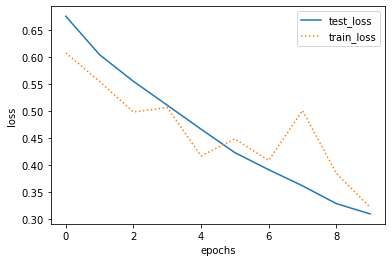

In [68]:
plt.plot(history.history['loss'], label = 'test_loss')
plt.plot(history.history['val_loss'], label = 'train_loss', linestyle = ':')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

4. Accuracy and loss of the evaluation on the testing set


Accuracy on the test data:
40/40 [==============================] - 1s 33ms/step - loss: 0.3220 - accuracy: 0.8648
0.864799976348877


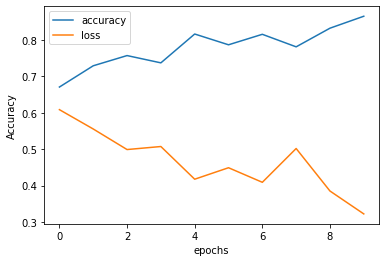

In [69]:
plt.plot(history.history['val_accuracy'], label = 'accuracy')
plt.plot(history.history['val_loss'], label='loss')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

print('\nAccuracy on the test data:')
print(model.evaluate(X_test, y_test)[1])

In [83]:
import keras
keras.models.save_model(model = model, filepath = r'C:\Users\wh\OneDrive - Akademia Leona Kozminskiego\Kozminski\2_Semester\Python\github\kozminski_intro_to_python\final_cats_dogs_model', save_format = "h5")

5. Let' take some pictures to check 

In [71]:
test_sample = X_test
predictions = model.predict(test_sample)
true_labels = y_test

In [72]:
len(test_sample)

1250

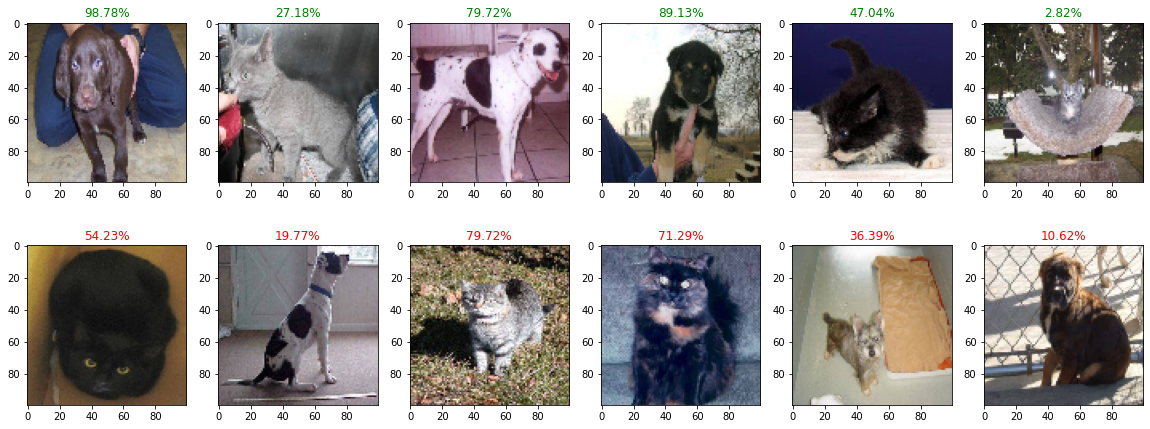

In [82]:
import random

fig = plt.figure(figsize=(20,15))
first_row = 1
second_row = 7
count_correct = 0
count_wrong = 0
while True:
    check_idx = random.randint(1, 1250)
    correct_response = true_labels[check_idx]
    net_claims = predictions[check_idx, 0]
    is_net_correct = np.abs(net_claims - correct_response) < 0.5
    if is_net_correct == 1 and count_correct < 6:
        text = '{:.2f}%'
        fig.add_subplot(1, 6, first_row)
        plt.imshow(test_sample[check_idx] / 255)
        plt.title(text.format(net_claims * 100), color = 'green')
        count_correct += 1
        first_row +=1
    if is_net_correct == 0 and count_wrong < 6:
        text = '{:.2f}%'
        fig.add_subplot(2, 6, second_row)
        plt.imshow(test_sample[check_idx] / 255)
        plt.title(text.format(net_claims * 100), color = 'red')
        count_wrong += 1
        second_row +=1
    if count_correct == 6 & count_wrong == 6:
        break
plt.show()


6. Predicting the model on own picture

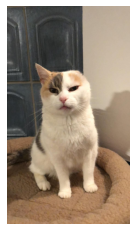

In [74]:
import matplotlib.image as mpimg

own_cat_img_1 = load_img(r'C:\Users\wh\Desktop\cat_pictures\cat_2.jpeg', target_size=(100, 100))
own_cat_img1_arr = img_to_array(own_cat_img_1)
img = mpimg.imread(r'C:\Users\wh\Desktop\cat_pictures\cat_2.jpeg')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()


In [75]:
first_pred = model.predict(own_cat_img1_arr.reshape(1,100,100,3))*100

print("The prediction value is %.2f" % first_pred, "%, which means ths picture has been calssified as a cat, which is correct")


The prediction value is 26.36 %, which means ths picture has been calssified as a cat, which is correct


(-0.5, 1511.5, 2015.5, -0.5)

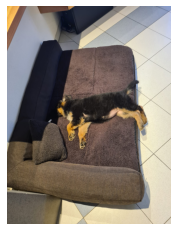

In [76]:
own_dog_img_1 = load_img(r'C:\Users\wh\Desktop\dog_pictures\dog_3.jpeg', target_size=(100, 100))
own_dog_img1_arr = img_to_array(own_dog_img_1)
img2 = mpimg.imread(r'C:\Users\wh\Desktop\dog_pictures\dog_3.jpeg')
imgplot2 = plt.imshow(img2)
plt.axis('off')


In [77]:
secondpred = model.predict(own_dog_img1_arr.reshape(1,100,100,3))*100

print("The prediction value is %.2f" % secondpred, "%, which means ths picture has been calssified as a dog, which is correct")

The prediction value is 94.40 %, which means ths picture has been calssified as a dog, which is correct
